1、加载并处理数据

In [1]:
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

data = pd.read_csv("./data/train.txt")

In [2]:
data.head()

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,1.0,1,5.0,0.0,1382.0,4.0,15.0,2.0,181.0,...,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,NaN,3a171ecb,c5c50484,e8b83407,9727dd16
1,0,2.0,0,44.0,1.0,102.0,8.0,2.0,2.0,4.0,...,07c540c4,b04e4670,21ddcdc9,5840adea,60f6221e,NaN,3a171ecb,43f13e8b,e8b83407,731c3655
2,0,2.0,0,1.0,14.0,767.0,89.0,4.0,2.0,245.0,...,8efede7f,3412118d,NaN,NaN,e587c466,ad3062eb,3a171ecb,3b183c5c,NaN,NaN
3,0,NaN,893,NaN,NaN,4392.0,NaN,0.0,0.0,0.0,...,1e88c74f,74ef3502,NaN,NaN,6b3a5ca6,NaN,3a171ecb,9117a34a,NaN,NaN
4,0,3.0,-1,NaN,0.0,2.0,0.0,3.0,0.0,0.0,...,1e88c74f,26b3c7a7,NaN,NaN,21c9516a,NaN,32c7478e,b34f3128,NaN,NaN


In [3]:
data.dtypes

label      int64
I1       float64
I2         int64
I3       float64
I4       float64
I5       float64
I6       float64
I7       float64
I8       float64
I9       float64
I10      float64
I11      float64
I12      float64
I13      float64
C1        object
C2        object
C3        object
C4        object
C5        object
C6        object
C7        object
C8        object
C9        object
C10       object
C11       object
C12       object
C13       object
C14       object
C15       object
C16       object
C17       object
C18       object
C19       object
C20       object
C21       object
C22       object
C23       object
C24       object
C25       object
C26       object
dtype: object

In [4]:
dense_features = ['I' + str(i) for i in range(1,14)]
dense_features

['I1',
 'I2',
 'I3',
 'I4',
 'I5',
 'I6',
 'I7',
 'I8',
 'I9',
 'I10',
 'I11',
 'I12',
 'I13']

In [5]:
sparse_features = ['C' + str(i) for i in range(1,27)]

In [6]:
#缺失值填充
data[dense_features] = data[dense_features].fillna(0)
data[sparse_features] = data[sparse_features].fillna('-1')
data.head()

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,1.0,1,5.0,0.0,1382.0,4.0,15.0,2.0,181.0,...,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,-1,3a171ecb,c5c50484,e8b83407,9727dd16
1,0,2.0,0,44.0,1.0,102.0,8.0,2.0,2.0,4.0,...,07c540c4,b04e4670,21ddcdc9,5840adea,60f6221e,-1,3a171ecb,43f13e8b,e8b83407,731c3655
2,0,2.0,0,1.0,14.0,767.0,89.0,4.0,2.0,245.0,...,8efede7f,3412118d,-1,-1,e587c466,ad3062eb,3a171ecb,3b183c5c,-1,-1
3,0,0.0,893,0.0,0.0,4392.0,0.0,0.0,0.0,0.0,...,1e88c74f,74ef3502,-1,-1,6b3a5ca6,-1,3a171ecb,9117a34a,-1,-1
4,0,3.0,-1,0.0,0.0,2.0,0.0,3.0,0.0,0.0,...,1e88c74f,26b3c7a7,-1,-1,21c9516a,-1,32c7478e,b34f3128,-1,-1


In [7]:
#归一化
data[dense_features] = MinMaxScaler().fit_transform(data[dense_features])
data.head()

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,0.010526,0.000381,0.000591,0.000000,0.001361,0.000862,0.009047,0.003656,0.032109,...,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,-1,3a171ecb,c5c50484,e8b83407,9727dd16
1,0,0.021053,0.000254,0.005203,0.011494,0.000100,0.001725,0.001206,0.003656,0.000710,...,07c540c4,b04e4670,21ddcdc9,5840adea,60f6221e,-1,3a171ecb,43f13e8b,e8b83407,731c3655
2,0,0.021053,0.000254,0.000118,0.160920,0.000756,0.019189,0.002413,0.003656,0.043463,...,8efede7f,3412118d,-1,-1,e587c466,ad3062eb,3a171ecb,3b183c5c,-1,-1
3,0,0.000000,0.113781,0.000000,0.000000,0.004326,0.000000,0.000000,0.000000,0.000000,...,1e88c74f,74ef3502,-1,-1,6b3a5ca6,-1,3a171ecb,9117a34a,-1,-1
4,0,0.031579,0.000127,0.000000,0.000000,0.000002,0.000000,0.001809,0.000000,0.000000,...,1e88c74f,26b3c7a7,-1,-1,21c9516a,-1,32c7478e,b34f3128,-1,-1


In [8]:
#one hot 编码
# https://blog.csdn.net/ymkfjuyhbh/article/details/99730972
data = pd.get_dummies(data)
data.dtypes

label             int64
I1              float64
I2              float64
I3              float64
I4              float64
                 ...   
C26_fdd86175      uint8
C26_fe7d4d4a      uint8
C26_ff2cdc2b      uint8
C26_ff86d5e0      uint8
C26_ffc123e9      uint8
Length: 13105, dtype: object

In [9]:
#数据集划分
#drop 函数， 0表示行， 1表示列
X = data.drop(['label'], axis=1).values
Y = data['label']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [10]:
X_train[0]

array([0.09473684, 0.00381388, 0.        , ..., 0.        , 0.        ,
       0.        ])

2、将FM封装为Layer,可以直接调用

In [14]:
import tensorflow.keras.backend as K
class FM_layer(tf.keras.layers.Layer):
    def __init__(self, k, w_reg, v_reg):
        print ("begin init")
        super(FM_layer, self).__init__()
        self.k = k  # 隐向量vi的维度
        self.w_reg = w_reg  # 权重w的正则项系数
        self.v_reg = v_reg  # 权重v的正则项系数
        
    # 需要根据input来定义shape的变量，可在build里定义
    # build会在第一次调用call时自动调用
    # input_shape : 	Instance of TensorShape, or list of instances of TensorShape if the layer expects a list of inputs (one instance per input). 
    def build(self, input_shape):
        print("begin build")
        print("input shape is :{}".format(input_shape))
        print("input_shape[-1] is {}".format(input_shape[-1]))
        self.w0 = self.add_weight(name='w0',
                                 shape=(1,),
                                 initializer=tf.zeros_initializer(),
                                 trainable=True)
        self.w = self.add_weight(name="w", shape=(input_shape[-1],1),
                                 initializer=tf.random_normal_initializer(),
                                 trainable=True,
                                 regularizer=tf.keras.regularizers.l2(self.w_reg))
        self.v = self.add_weight(name='v', shape=(input_shape[-1], self.k),
                                 initializer=tf.random_normal_initializer(),
                                 trainable=True,
                                 regularizer=tf.keras.regularizers.l2(self.v_reg))
    
    def call(self, inputs, **kwargs):
        print ("begin call")
        print("input shape is {}".format(inputs.shape))
        if K.ndim(inputs) != 2:
            raise ValueError("Unexpected inputs dimensions %d, expect to be 2 dimensions" % (K.ndim(inputs)))
        #线性部分，相当于逻辑回归
        print("self.w0 shape is {}".format(self.w0.shape))
        print("self.w shape is {}".format(self.w.shape))
        print("self.v shape is {}".format(self.v.shape))
        #(1599, 13104) * (13104, 1) 输出 shape:(batchsize 1599, 1)
        linear_part = tf.matmul(inputs, self.w) + self.w0
        #pow函数解释 https://blog.csdn.net/qq_36512295/article/details/100600813
        #matmul返回的矩阵， 各元素求2次幂
        #output shape:(batchsize, self.k)
        inter_part1 = tf.pow(tf.matmul(inputs, self.v), 2)
        #output shape:(batchsize, self.k)
        inter_part2 = tf.matmul(tf.pow(inputs,2),tf.pow(self.v, 2))
        #-1表示最后一维，这里就是列那一维度
        #axis=-1, outputshape:(batchsize, 1)
        inter_part = 0.5*tf.reduce_sum(inter_part1 - inter_part2, axis=-1, keepdims=True)
        output = linear_part + inter_part
        return tf.nn.sigmoid(output) #shape:(batchsize, 1)
        
#测试
#a = FM_layer(8, 0.1, 0.1) # 默认会调用 FM_layer的__init()
#a(X_train) # 默认会调用FM_layer的build() 与call()

#定义model


begin init
begin build
input shape is :(None, 13104)
input_shape[-1] is 13104
begin call
input shape is (None, 13104)
self.w0 shape is (1,)
self.w shape is (13104, 1)
self.v shape is (13104, 8)


3、定义model，训练model

In [12]:
features = tf.keras.layers.Input(shape=(X_train.shape[-1],))
output = FM_layer(8, 0.1, 0.1)(features)
model = tf.keras.models.Model(inputs=features, outputs=output)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.experimental.SGD(0.1),
             metrics=[tf.keras.metrics.AUC(from_logits=True)])

In [13]:
history = model.fit(x=X_train,y=Y_train, 
                    batch_size=32, 
                    epochs=30,
                    verbose=1)

Epoch 1/30
begin call
input shape is (None, 13104)
self.w0 shape is (1,)
self.w shape is (13104, 1)
self.v shape is (13104, 8)
50/50 [==============================] - 0s 2ms/step - loss: 13.4358 - auc: 0.5373
Epoch 2/30
50/50 [==============================] - 0s 2ms/step - loss: 2.2348 - auc: 0.6194
Epoch 3/30
50/50 [==============================] - 0s 2ms/step - loss: 0.7466 - auc: 0.6595
Epoch 4/30
50/50 [==============================] - 0s 2ms/step - loss: 0.5473 - auc: 0.6647
Epoch 5/30
50/50 [==============================] - 0s 2ms/step - loss: 0.5179 - auc: 0.6788
Epoch 6/30
50/50 [==============================] - 0s 2ms/step - loss: 0.5121 - auc: 0.6750
Epoch 7/30
50/50 [==============================] - 0s 2ms/step - loss: 0.5122 - auc: 0.6728
Epoch 8/30
50/50 [==============================] - 0s 2ms/step - loss: 0.5102 - auc: 0.6804
Epoch 9/30
50/50 [==============================] - 0s 2ms/step - loss: 0.5095 - auc: 0.6875
Epoch 10/30
50/50 [===========================

4、打印history

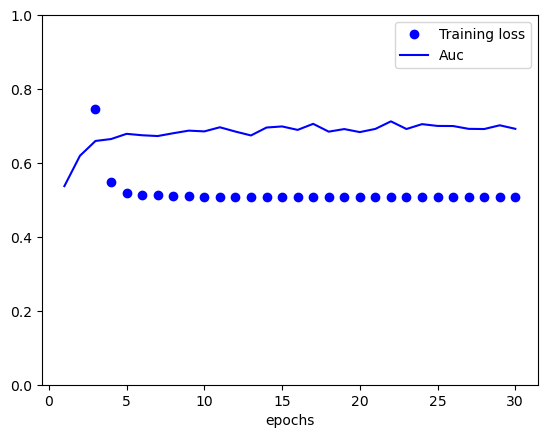

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
auc = history_dict['auc']
loss = history_dict['loss']

epochs = range(1,len(auc)+1)
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, auc, "b", label="Auc")
plt.ylim(0,1)
plt.xlabel('epochs')
#显示xlabel, ylabel。图例
plt.legend()
plt.show()